In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [5]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [6]:
names = list(grouped_dataframes.keys())

for i in range(0,len(names)):
    print(names[i])
    print(grouped_dataframes[names[i]]['traffic_flow'].mean())

('0 450-0 7/ 300 +', 552601.0, 6329842.0)
98.4452628753765
('0 450-0 7/ 300 +1', 552601.0, 6329842.0)
17.281543554110876
('0 450-0 7/ 300 +2', 552601.0, 6329842.0)
81.16371932126562
('0 450-0 7/ 300 -', 552601.0, 6329842.0)
100.75251245042197
('0 450-0 7/ 300 -1', 552601.0, 6329842.0)
16.479110130319388
('0 450-0 7/ 300 -2', 552601.0, 6329842.0)
84.27340232010259
('0 450-0 7/ 300 T', 552601.0, 6329842.0)
199.19777532579846
('0 450-0 9/1675 +', 549360.0, 6330576.0)
75.10419506285022
('0 450-0 9/1675 -', 549360.0, 6330576.0)
79.83791879112188
('0 450-0 9/1675 -1', 549360.0, 6330576.0)
4.512881350228011
('0 450-0 9/1675 -2', 549360.0, 6330576.0)
75.32503744089387
('0 450-0 9/1675 T', 549360.0, 6330576.0)
154.9421138539721
('0 70-0 277/ 100 +', 552269.0, 6311346.0)
243.60496382558904
('0 70-0 277/ 100 -', 552269.0, 6311346.0)
268.5357590482251
('0 70-0 277/ 100 T', 552269.0, 6311346.0)
383.1573385858821
('0 70-0 278/ 201 +', 552730.0, 6312348.0)
219.878362505536
('0 70-0 278/ 201 +1', 5527

In [7]:
grouped_dataframes[('0 450-0 9/1675 -1', 549360.0, 6330576.0)]

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1672527600,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:00-00:15,0.0,00:00
1672528500,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:15-00:30,1.0,00:15
1672529400,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:30-00:45,0.0,00:30
1672530300,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:45-01:00,1.0,00:45
1672531200,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,01:00-01:15,2.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,22:45-23:00,1.0,22:45
1704060000,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,23:15-23:30,NaN,23:15


In [8]:
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [ ]:
import math
closest = dict()
cleaned_dataframes = {}

for i in range(0,len(names)):
    print(i, len(names))
    df = grouped_dataframes[names[i]]
    cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']]
    first = df.first_valid_index()

    x1,y1 = df['Xkoordinat'][first], df['Ykoordinat'][first]

    
    for j in range(0,len(names)):
        if j!=i:
            df2 = grouped_dataframes[names[j]]
            first2 = df2.first_valid_index()
            x2,y2 = df2['Xkoordinat'][first2], df2['Ykoordinat'][first2]
            closest[j] = euclidean_distance(x1,x2,y1,y2)
    
    smallest_edge = min(closest, key=closest.get)
    cleaned_dataframes[i]['closest_edge'] = smallest_edge


In [30]:
graph = nx.Graph()
names = list(cleaned_dataframes.keys())
for i in range(0,len(names)):
    print(i, len(names))
    idx = cleaned_dataframes[names[i]].first_valid_index()
    graph.add_node(i, x=cleaned_dataframes[names[i]]['Xkoordinat'][idx], y=cleaned_dataframes[names[i]]['Ykoordinat'][idx], traffic=cleaned_dataframes[names[i]]['traffic_flow'].to_dict())
    graph.add_edge(i,cleaned_dataframes[names[i]]['closest_edge'][idx])


0 485
1 485
2 485
3 485
4 485
5 485
6 485
7 485
8 485
9 485
10 485
11 485
12 485
13 485
14 485
15 485
16 485
17 485
18 485
19 485
20 485
21 485
22 485
23 485
24 485
25 485
26 485
27 485
28 485
29 485
30 485
31 485
32 485
33 485
34 485
35 485
36 485
37 485
38 485
39 485
40 485
41 485
42 485
43 485
44 485
45 485
46 485
47 485
48 485
49 485
50 485
51 485
52 485
53 485
54 485
55 485
56 485
57 485
58 485
59 485
60 485
61 485
62 485
63 485
64 485
65 485
66 485
67 485
68 485
69 485
70 485
71 485
72 485
73 485
74 485
75 485
76 485
77 485
78 485
79 485
80 485
81 485
82 485
83 485
84 485
85 485
86 485
87 485
88 485
89 485
90 485
91 485
92 485
93 485
94 485
95 485
96 485
97 485
98 485
99 485
100 485
101 485
102 485
103 485
104 485
105 485
106 485
107 485
108 485
109 485
110 485
111 485
112 485
113 485
114 485
115 485
116 485
117 485
118 485
119 485
120 485
121 485
122 485
123 485
124 485
125 485
126 485
127 485
128 485
129 485
130 485
131 485
132 485
133 485
134 485
135 485
136 485
137 485
138 48

In [26]:
cleaned_dataframes[0]

,traffic_flow,Xkoordinat,Ykoordinat,closest_edge
datetime,,,,
1675206000,10.0,552601.0,6329842.0,430
1675206900,10.0,552601.0,6329842.0,430
1675207800,7.0,552601.0,6329842.0,430
1675208700,3.0,552601.0,6329842.0,430
1675209600,3.0,552601.0,6329842.0,430
...,...,...,...,...
1704059100,19.0,552601.0,6329842.0,430
1704060000,NaN,552601.0,6329842.0,430
1704060900,NaN,552601.0,6329842.0,430


In [ ]:
for node, data in graph.nodes(data=True):
    print(node, data)
    graph.nodes[node]

0 {'x': 552601.0, 'y': 6329842.0, 'traffic': {1675206000: 10.0, 1675206900: 10.0, 1675207800: 7.0, 1675208700: 3.0, 1675209600: 3.0, 1675210500: 2.0, 1675211400: 1.0, 1675212300: 2.0, 1675213200: 4.0, 1675214100: 1.0, 1675215000: 2.0, 1675215900: 3.0, 1675216800: 0.0, 1675217700: 2.0, 1675218600: 8.0, 1675219500: 1.0, 1675220400: 3.0, 1675221300: 8.0, 1675222200: 8.0, 1675223100: 8.0, 1675224000: 14.0, 1675224900: 19.0, 1675225800: 37.0, 1675226700: 42.0, 1675227600: 46.0, 1675228500: 93.0, 1675229400: 151.0, 1675230300: 161.0, 1675231200: 175.0, 1675232100: 265.0, 1675233000: 221.0, 1675233900: 201.0, 1675234800: 134.0, 1675235700: 145.0, 1675236600: 120.0, 1675237500: 104.0, 1675238400: 99.0, 1675239300: 91.0, 1675240200: 88.0, 1675241100: 82.0, 1675242000: 99.0, 1675242900: 92.0, 1675243800: 98.0, 1675244700: 105.0, 1675245600: 105.0, 1675246500: 98.0, 1675247400: 88.0, 1675248300: 115.0, 1675249200: 131.0, 1675250100: 137.0, 1675251000: 116.0, 1675251900: 125.0, 1675252800: 130.0, 

In [ ]:
graph.nodes[0]

{'x': 552601.0,
 'y': 6329842.0,
 'traffic': {1675206000: 10.0,
  1675206900: 10.0,
  1675207800: 7.0,
  1675208700: 3.0,
  1675209600: 3.0,
  1675210500: 2.0,
  1675211400: 1.0,
  1675212300: 2.0,
  1675213200: 4.0,
  1675214100: 1.0,
  1675215000: 2.0,
  1675215900: 3.0,
  1675216800: 0.0,
  1675217700: 2.0,
  1675218600: 8.0,
  1675219500: 1.0,
  1675220400: 3.0,
  1675221300: 8.0,
  1675222200: 8.0,
  1675223100: 8.0,
  1675224000: 14.0,
  1675224900: 19.0,
  1675225800: 37.0,
  1675226700: 42.0,
  1675227600: 46.0,
  1675228500: 93.0,
  1675229400: 151.0,
  1675230300: 161.0,
  1675231200: 175.0,
  1675232100: 265.0,
  1675233000: 221.0,
  1675233900: 201.0,
  1675234800: 134.0,
  1675235700: 145.0,
  1675236600: 120.0,
  1675237500: 104.0,
  1675238400: 99.0,
  1675239300: 91.0,
  1675240200: 88.0,
  1675241100: 82.0,
  1675242000: 99.0,
  1675242900: 92.0,
  1675243800: 98.0,
  1675244700: 105.0,
  1675245600: 105.0,
  1675246500: 98.0,
  1675247400: 88.0,
  1675248300: 115.0,
 

KeyError: 'crs'

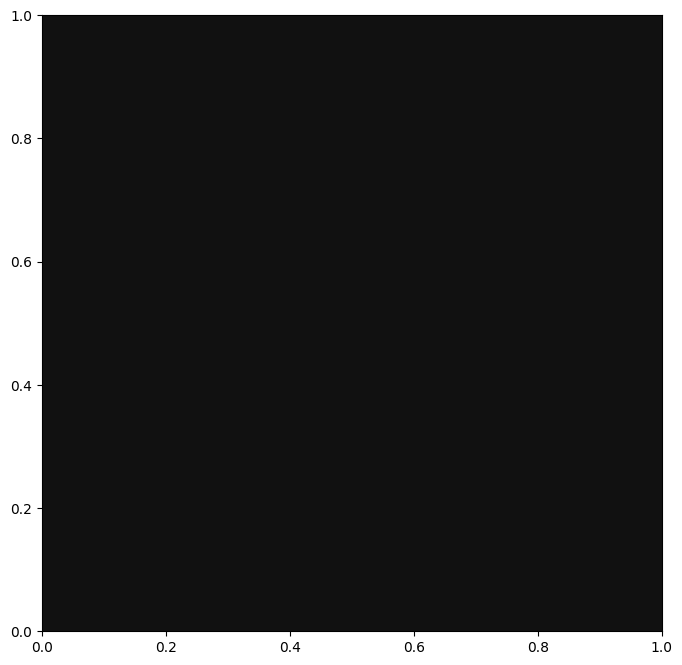

In [ ]:
ox.plot_graph(graph)